# Продвинутый Python, лекция 3

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Бузаев Федор, Дешеулин Олег, Коган Александра

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

Сегодня мы обсудим Pandas и основы визуализации в виде Matplotlib и попробуем на небольшом примере что-нибудь порисовать

## Pandas

![](https://drive.google.com/uc?export=view&id=1L031HekamufnACOzz66AENng0em4DHhJ)

Все видели эту картинку (ну в общем-то это правда). Однако можно же не только Экселем пользоваться

Вот для этого и есть Pandas. Помимо того, что это такие таблицы, чтобы заменить Эксель, это еще и очень удобная штука для EDA (exploratory data analysis)

[Документация](https://pandas.pydata.org/docs/)

### Начинаем

Будем смотреть это все на данных про аниме и их рейтингов

![аниме](https://steamuserimages-a.akamaihd.net/ugc/795365202390752570/FF835BAC56853D50EEAE303BFEF92369987ADEDE/?imw=512&amp;imh=400&amp;ima=fit&amp;impolicy=Letterbox&amp;imcolor=%23000000&amp;letterbox=true)

In [ ]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Lectures/Lecture_2/archive.zip

In [ ]:
!unzip archive.zip

Откуда может потребоваться загрузка данных?

* CSV/TXT - просто обычный файлик (данные разделены пробелами/табами/запятыми)

* Словари (например, те же json-чики, если нам необходимо считать)

* Excel - чаще всего приходиться выгружать, чем загружать, но тем не менее

* БД - загрузки из баз данных (святое)

Какие есть функции для этого?

* read_csv() - считываем данные с csv/txt/файла

* read_excel() - считываем данные с Экселя (какой-то из листов)

* read_json() - считываем json-файл в качестве таблицы

* read_sql() - считываем SQL-запрос (про это скажем в лекции про коннекторы)

На самом деле их больше, вот [шпора](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

Давайте на примерах:

In [ ]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

Посмотрим, что там находится. Это можно сделать с помощью функций:

* pd.head(n) - посмотреть первые n строк

* pd.tail(n) - посмотреть последние n строк

* ну или просто вызвать сам dataframe

In [ ]:
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [ ]:
rating.tail(10)

,user_id,anime_id,rating
7813727,73515,13161,8
7813728,73515,13331,9
7813729,73515,13599,7
7813730,73515,13659,8
7813731,73515,14345,7
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


А также можно посмотреть рандомные 10 строк (ну или сколько захотим):

In [ ]:
anime.sample(10) # Вопрос: а зачем?

Разбираемся в параметрах:

* sep - разделитель (актуально для текстового формата, где мы задаем, как разделяются значения, по дефолту = запятая)

* header - какая строка является названиями для колонок и началом вообще датасета. Если у нас нет названий колонок в файле, то мы незатейливо говорим header=None

* names - название для колонок, которые мы хотим получить (что здесь важно - работает в совокупе с header)

* index_col - какую колонку (по номеру или названию) использовать в качестве индекса

* usecols - какие колонки нужно взять (если вы не хотите брать все колонки)

* true_values/false_values - список того, какие значения, помимо True/False должны считаться таковыми (пример: если в вашем датасете ответы в виде Yes/No)

* parse_dates - какие колонки являются датами

* date_format - как парсить дату

* dayfirst - первее день или месяц в дате

* thousands - разделитель для тысяч в числе

* decimal - разделитель для целой и дробной части в числе

* encoding - кодирование (какое кодирование чаще всего убивает русский язык? Прааавильно, cp1252)

* on_bad_lines - {"error", "warn", "skip"} (что делать с плохой строкой, если мы не хотим, чтобы вызывалась всегода ошибка и все падало)

Выглядит сложно? Абсолютно, поэтому давайте на примерах поэтапно (для этого давайте посмотрим на flop_file.csv):

In [ ]:
df = pd.read_csv("flop_file.csv")
df

ParserError: ignored

In [ ]:
df = pd.read_csv("flop_file.csv", sep=' ')

ParserError: ignored

In [ ]:
df = pd.read_csv("flop_file.csv", sep=' ', on_bad_lines="skip")
df

,14,13,265
0,ахахах,ахахахахахах,ах
1,"3,1415926",1000,20
2,yes,yes,no
3,2022-12-01,2022-12-31,2001-01-01


In [ ]:
df = pd.read_csv("flop_file.csv", header=None, sep=' ', on_bad_lines="skip")
df

,0,1,2
0,14,13,265
1,ахахах,ахахахахахах,ах
2,"3,1415926",1000,20
3,yes,yes,no
4,2022-12-01,2022-12-31,2001-01-01


In [ ]:
df = pd.read_csv("flop_file.csv", names=["col_1", "col_2", "col_3"], sep=' ', on_bad_lines="skip")
df

,col_1,col_2,col_3
0,14,13,265
1,ахахах,ахахахахахах,ах
2,"3,1415926",1000,20
3,yes,yes,no
4,2022-12-01,2022-12-31,2001-01-01


In [ ]:
df = pd.read_csv("flop_file.csv", names=["col_1", "col_2", "col_3"], usecols=[0,1], sep=' ', on_bad_lines="skip")
df

,col_1,col_2
0,14,13
1,ахахах,ахахахахахах
2,очень,плохая
3,"3,1415926",1000
4,yes,yes
5,2022-12-01,2022-12-31


In [ ]:
df = pd.read_csv("flop_file.csv", names=["col_1", "col_2", "col_3"], usecols=[0,1], sep=' ', on_bad_lines="skip", true_values=["yes"], false_values=["no"])
df

,col_1,col_2
0,14,13
1,ахахах,ахахахахахах
2,очень,плохая
3,"3,1415926",1000
4,yes,yes
5,2022-12-01,2022-12-31


Можно создать и из коробки:

In [ ]:
df = pd.DataFrame([[1,'A', 'Ahah'],
                  [2,'B', 'Ahah'],
                  [3,'C', 'Ahaha']],
columns=['id','name', 'surname'])
df

,id,name,surname
0,1,A,Ahah
1,2,B,Ahah
2,3,C,Ahaha


Одна из важных составляющих - это копирование. Почему?

Потому что очень часто вы будете видеть предупреждение, что пытаетесь изменить или сделать слайс в оригинальном датасете или в копии (и вас это будет мучать). Так что тут важно каждый раз понимать - копия или не копия

Чтобы явно скопировать, мы делаем copy

In [ ]:
anime_2 = anime.copy(deep=True) #deep говорит, что физически его надо скопировать

### Как и что смотреть

Как вы могли догадаться, рандомный просмотр строк нам необходим в случае, если у нас данные уже как-то упорядочены (получается, что если мы берем head или tail, то мы получаем нерандомный сэмпл)

А допустим, что мы реально хотим получить отсортированный массив, что тогда делать?

In [ ]:
df_anime.sort_values(by=['episodes', 'rating'], ascending=[True, False])

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


Тут мы смотрим на все столбцы, которые у нас. В данном случае все читабельно и понятно, но давайте представим логи, где у вас есть очень и очень много технических полей, которые вам ни о чем не скажут. Как же быть?

Ответ - можно выбирать необходимые нам столбцы!

In [ ]:
df_anime[["name", "genre", "episodes", "rating"]] #можно выбрать 1, можно несколько

,name,genre,episodes,rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25
3,Steins;Gate,"Sci-Fi, Thriller",24,9.17
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.16
...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,1,4.15
12290,Under World,Hentai,1,4.28
12291,Violence Gekiga David no Hoshi,Hentai,4,4.88
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,1,4.98


Окей, вспоминаем, что у нас pandas очень похож на табличку (как будто массив массивов в NumPy). А можем ли мы работать с ним также, как и с обычным массивом?

In [ ]:
df_anime.set_index("anime_id")[0:10]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534


In [ ]:
df_anime[0:10] #построчно выглядит как будто можно

In [ ]:
df_anime[0:10, 1:2] #а вот так нельзя)

А почему? А просто из-за того, как устроен DataFrame

На пальцах: есть два представления DataFrame внутри Pandas. Первое - в виде tuplов, прдеставляющие собой строки (поэтому всегда можно сделать первый запрос)

И второй - в виде словарика типа "название колонки" - значения

Поэтому операция обращения к строке отдельно и отдельно к колонкам - быстрое

И поэтому обращение вначале к строкам, а потом к столбцам - долгое (а вот наоборот быстрее - почему?)



In [ ]:
%%time
df_anime["name"][0:100]

CPU times: user 316 µs, sys: 0 ns, total: 316 µs
Wall time: 325 µs


0                       Kimi no Na wa.
1     Fullmetal Alchemist: Brotherhood
2                             Gintama°
3                          Steins;Gate
4                        Gintama&#039;
                    ...               
95       JoJo no Kimyou na Bouken (TV)
96          Mahou Shoujo Madoka★Magica
97                            Nichijou
98                         Psycho-Pass
99                           Barakamon
Name: name, Length: 100, dtype: object

In [ ]:
%%time
df_anime[0:100]["name"]

CPU times: user 2.12 ms, sys: 0 ns, total: 2.12 ms
Wall time: 8.96 ms


0                       Kimi no Na wa.
1     Fullmetal Alchemist: Brotherhood
2                             Gintama°
3                          Steins;Gate
4                        Gintama&#039;
                    ...               
95       JoJo no Kimyou na Bouken (TV)
96          Mahou Shoujo Madoka★Magica
97                            Nichijou
98                         Psycho-Pass
99                           Barakamon
Name: name, Length: 100, dtype: object

Ну хорошо, а допустим, что я не помню названий, но вот точно знаю, какой номер колонки мне нужен? (аналогично со строчками и индексами)

для этого есть loc и iloc! Сделаем в качестве индекса для наглядности названия аниме

In [ ]:
df_anime = df_anime.set_index("name")
df_anime.head(5)

,anime_id,genre,type,episodes,rating,members
name,,,,,,
Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
Fullmetal Alchemist: Brotherhood,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
Gintama°,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
Steins;Gate,9253,"Sci-Fi, Thriller",TV,24,9.17,673572
Gintama&#039;,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df_anime.iloc[0:10,3:5]

,episodes,rating
name,,
Kimi no Na wa.,1,9.37
Fullmetal Alchemist: Brotherhood,64,9.26
Gintama°,51,9.25
Steins;Gate,24,9.17
Gintama&#039;,51,9.16
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,10,9.15
Hunter x Hunter (2011),148,9.13
Ginga Eiyuu Densetsu,110,9.11
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,1,9.10


In [ ]:
df_anime.loc["Steins;Gate":"Ginga Eiyuu Densetsu", "genre":"rating"]

,genre,type,episodes,rating
name,,,,
Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17
Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15
Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13
Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11


А теперь я хочу сделать индекс нормальным. В данному случае необходимо просто его "заресетить"

In [ ]:
df_anime = df_anime.reset_index(names=["name"])
df_anime

,name,anime_id,genre,type,episodes,rating,members
0,Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,9253,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,9316,Hentai,OVA,1,4.15,211
12290,Under World,5543,Hentai,OVA,1,4.28,183
12291,Violence Gekiga David no Hoshi,5621,Hentai,OVA,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,6133,Hentai,OVA,1,4.98,175


### Первые шаги

In [ ]:
print(len(anime)) #сколько строк в массиве
print('-' * 30)
print(anime.info()) #описание для всех
print('-' * 30)
print(anime.describe()) # общее описание для нестроковых данных

12294
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
------------------------------
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000 

Первое, что нас напрягает - число эпизодов же тоже число, почему он object? Давайте посмотрим на все уникальные значения:

In [ ]:
anime.episodes.unique() #вывести все уникальные значения
#Любой столбец в DataFrame - это Series. Здесь у нас array, поскольку unique() преобразовывает
#Видим Unknown, печаль

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
# Отфильтруем и посмотрим, где там Unknown
anime[anime.episodes == 'Unknown'][['name', 'genre', 'episodes']] #выберем еще конкретные колонки
# Ну это аниме, что еще не все до конца вышло (да, это старая таблица, в Наруто тут еще не кончились серии)

,name,genre,episodes
74,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Unknown
252,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",Unknown
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",Unknown
991,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Unknown
1021,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Unknown
...,...,...,...
12265,Kyonyuu Reijou MC Gakuen,Hentai,Unknown
12274,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,Unknown
12280,Saimin Class,Hentai,Unknown
12282,Shikkoku no Shaga The Animation,Hentai,Unknown


Как исследовать колонки со строками? Можно с помощью value_counts():

In [ ]:
anime.genre.value_counts() #тут тоже получаем Series

Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64

Хотим добавить новую колонку (например, флаг, что это все аниме):

In [ ]:
anime['is_anime'] = True
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members,is_anime
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,True
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,True
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,True
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,True
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,True


А допустим хотим удалить, это делается вот так (удалим из копии):

In [ ]:
anime_2.drop(['rating', 'members'], axis=1).head()

,anime_id,name,genre,type,episodes
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51


Отдельно для столбцов можно смотреть суммы, среднее, минимум/максимум, медиану, а также стандартное отклонение:

In [ ]:
print(anime.rating.sum())
print('-' * 30)
print(anime.rating.mean())
print('-' * 30)
print(anime.rating.std())
print('-' * 30)
print(anime.rating.min())
print('-' * 30)
print(anime.rating.max())
print('-' * 30)
print(anime.rating.median())

78101.15
------------------------------
6.473901690981432
------------------------------
1.0267463068980571
------------------------------
1.67
------------------------------
10.0
------------------------------
6.57


### Слияние строк и поиск по строкам

Допустим, мы хотим добавить новое аниме (допустим, [Атаку титанов](https://en.wikipedia.org/wiki/Attack_on_Titan_(TV_series))):

In [ ]:
print(list(anime.columns)) #посмотрели колонки

new_anime = pd.DataFrame([['Attack on Titans', 'Action, Dark fantasy', 'TV', '87', 9.0, 100000, True]]
                         , columns = list(anime.columns))
new_anime

['name', 'genre', 'type', 'episodes', 'rating', 'members', 'is_anime']


,name,genre,type,episodes,rating,members,is_anime
0,Attack on Titans,"Action, Dark fantasy",TV,87,9.0,100000,True


In [ ]:
anime = pd.concat([anime, new_anime]) #есть еще ignore_index, если его проставить, то тогда индекс поменяется на от 0 до конца
anime #ура, доабвили

,name,genre,type,episodes,rating,members,is_anime
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
...,...,...,...,...,...,...,...
5543,Under World,Hentai,OVA,1,4.28,183,True
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,True
6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,True
26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,True


Ладно, удалим для простоты:

In [ ]:
anime = anime.drop([0])
anime

,name,genre,type,episodes,rating,members,is_anime
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
...,...,...,...,...,...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,True
5543,Under World,Hentai,OVA,1,4.28,183,True
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,True
6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,True


### Сортировка и агрегация

Хотим посмотреть самые худшие аниме по версии людей:

In [ ]:
anime.sort_values('rating', ascending=True).head(10) # что такое жанр Dementia...

,name,genre,type,episodes,rating,members,is_anime
34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51,True
20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129,True
3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680,True
13405,Utsu Musume Sayuri,"Comedy, Dementia",OVA,1,2.14,4047,True
413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557,True
14781,Roboteuwang Sseonsyakeu,"Action, Mecha, Sci-Fi",Movie,1,2.49,121,True
24259,Mechano: Scientific Attack Force,"Comedy, Dementia, Fantasy, Horror, Music, Parody",OVA,3,2.55,120,True
33863,Cakes,Comedy,ONA,Unknown,2.58,56,True
31634,Kokuhaku,Horror,ONA,1,2.67,816,True
29949,Nami,Dementia,Movie,1,2.67,1817,True


Хотим теперь агрегировать какие-нибудь значения (например, хочу узнать по типу средний рейтинг, а еще их число). Это можно сделать с помощью groupby (тут уже синтаксис становится все более похожим на SQL):

In [ ]:
anime.groupby(["type"]).agg({"rating": "mean", "name": "count"}).reset_index() #красота, можно использовать

,type,rating,name
0,Movie,6.318058,2348
1,Music,5.588996,488
2,ONA,5.643298,659
3,OVA,6.375221,3311
4,Special,6.523501,1676
5,TV,6.902299,3787


### JOIN THE NAVY

Не забудем, что у нас еще есть таблица rating. Давайте на нее посмотрим отдельно:

In [ ]:
rating.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Видим anime_id, как и в исходной таблице. Теперь бы нам join сделать было бы хорошо. Давайте так и сделаем:

In [ ]:
anime.join(rating.set_index('anime_id'), lsuffix='_anime', rsuffix='_user')
#чтобы смапить нужен общий индекс, если есть одинаковые колонки (rating), то добавляем суффиксы, дабы не было коллизий

,name,genre,type,episodes,rating_anime,members,is_anime,user_id,rating_user
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,True,13.0,-1.0
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,True,19.0,10.0
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,True,21.0,9.0
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,True,23.0,9.0
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,True,32.0,10.0
...,...,...,...,...,...,...,...,...,...
34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295,True,NaN,NaN
34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy,Special,9,5.67,94,True,48766.0,-1.0
34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,Unknown,NaN,381,True,NaN,NaN
34525,Centaur no Nayami,"Comedy, Fantasy, Slice of Life, Supernatural",TV,Unknown,NaN,108,True,NaN,NaN


### Apply

Есть очень крутая фича, называется apply. Допустим, что мы хотим создать колонку, где будет отмечать контент 18+ (то есть по жанру Хентай). С помощью apply, смотря на значение и применив лямбда-функцию, мы получим то, что нужно:

In [ ]:
anime

,name,genre,type,episodes,rating,members,is_anime
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
...,...,...,...,...,...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,True
5543,Under World,Hentai,OVA,1,4.28,183,True
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,True
6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,True


In [ ]:
anime.genre.unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [ ]:
anime["adult"] = anime.genre.apply(lambda x: int('Hentai' in str(x))) # то есть берем значения в genre, для них берем лямбда функцию и итерируемся
anime

,name,genre,type,episodes,rating,members,is_anime,adult
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True,0
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True,0
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True,0
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True,0
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True,0
...,...,...,...,...,...,...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,True,1
5543,Under World,Hentai,OVA,1,4.28,183,True,1
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,True,1
6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,True,1


### Запись

Поработали и хватит. Давайте запишем наши данные, чтобы они были и нам не пришлось все запускать заново:

In [ ]:
anime.to_csv("anime_new.csv") #запиываем в csv

## Matplotlib

Matplotlib изначально задумывался следующим образом: внутри MATLAB есть возможность отрисовывать графики (понятно для чего), однако такой реализации не было в Python. Поэтому изначально он максимально пытался подражать MATLAB для отрисовки, однако дело зашло куда дальше

Это очень хороший и сильный инструмент для отрисовки, однако в нем есть определенный недостаток: он сложно устроен (то есть на нем можно все, но для этого все надо покапаться)

Давайте немного покапаемся [документация](https://matplotlib.org/stable/api/index.html)

![](https://carboncostume.com/wordpress/wp-content/uploads/2020/07/jacky-brawl-stars-975x600.png)

### База

Давайте разберем базово, как рисовать графики:

* plot - линия

* scatter - точки

* bar - столбики

Чтобы хоть что-то нарисовать, нам нужны две координаты: x и y (и они должна сходиться в размерностях, duh)

Будем рисовать график суммы синусов и косинусов для разнообразия

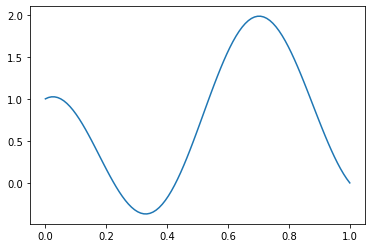

In [ ]:
x = np.linspace(0, 1, num=100, endpoint=True)
y = np.sin(2 * x) + np.cos(9 * x)


plt.plot(x, y)
plt.show() # Отдельно вызываем, что график нужно показать, поскольку внутри plt вы создаете просто объект для отрисовки

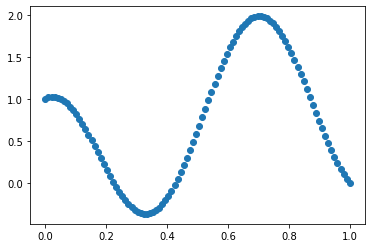

In [ ]:
plt.scatter(x, y) # то же самое, но точками
plt.show()

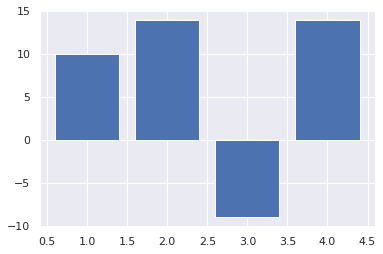

In [ ]:
x_bar = [1, 2, 3, 4]
y_bar = [10, 14, -9, 14]
plt.bar(x_bar, y_bar)
plt.show()

### Форматирование осей и подписи

Вот мы что-то нарисовали, чего не хватает?

* подписей

* легенды (что мы вообще нарисовали)

* названия

Давайте добавим!

1. xlabel - подпись OX

2. ylabel - подпись OY

3. title - название графика

4. xticks - масштабы по OX

5. yticks - масштабы по OY


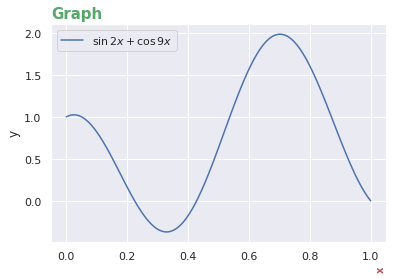

In [ ]:
plt.plot(x, y, label="$\sin 2x + \cos 9x$")
plt.xlabel('x', fontsize=10, fontweight='bold', color='r', loc='right', rotation=90) # назначить название оси OX
plt.ylabel('y') # назначить название оси OY
plt.title("Graph", fontsize=15, fontweight='bold', loc='left', color='g') # добавить название графику
plt.legend() #Вывод легенды, если не сделать, то не выведет
plt.show()

Пара комментариев относительно любых строк (когда мы что-то подписываем):

При выхове функции мы получаем объект типа [matplotlib.text](https://matplotlib.org/stable/api/text_api.html). Какие аргументы есть у любого текста:

* fontsize - размер шрифта

* fontweight - вес шрифта (например, bold - жирный шрифт)

* fontstyle - тип шрифта (например, italic)

* rotation - крутим-вертим (в градусах)

* color - цвет

* loc - как размещать (центр, лево-право)

Хорошо, что еще мы можем сделать с осями?

* Мы не всегда хотим в качестве оси X видеть числа (актуально для bar chart: хотим видеть название категории)

* Не всегда хотим видеть всю картину, а хотим ограничить значения x и y

* Иногда хотим видеть более детальную разметку (скажем, сейчас у нас шаг 0.2, а хотим 0.1)

Что же: matplotlib позволяет спокойно все это форматировать и использовать

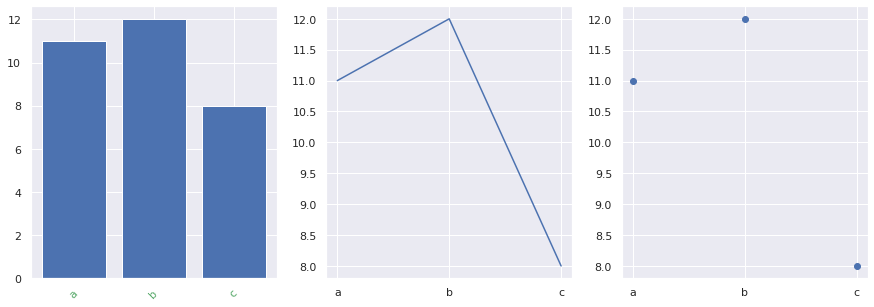

In [ ]:
names = ["a", "b", "c"]
values = [11, 12, 8]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(names, values) # работа с bar
plt.xticks(color='g', rotation=45)
plt.subplot(1, 3, 2) # про вот это обсудим позже
plt.plot(names, values) # работа с линией
plt.subplot(1, 3, 3)
plt.scatter(names, values) # работа с точками
plt.show()

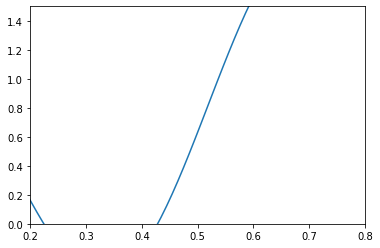

In [ ]:
plt.plot(x, y)
plt.xlim((0.2, 0.8)) # ограничить диапазон по x
plt.ylim((0, 1.5)) # ограничить диапазон по y
plt.show() #получили некоторый срез по границам xlim и ylim

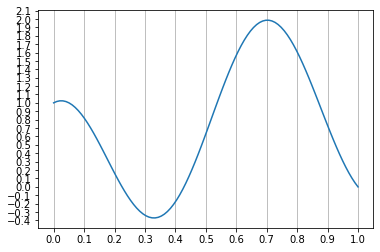

In [ ]:
plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1)) # задаем масштабы для оси OX
plt.yticks(np.arange(-0.4, 2.2, 0.1)) # задаем масштабы для оси OY
plt.grid(axis='x') #Можем также добавить координатную сетку (по дефолту сделает полную сетку)
plt.show()

### Какие еще есть графики?

* hist - гистограммы

* boxplot - "ящик с усами"

* violinplot - диаграмма-виолончель

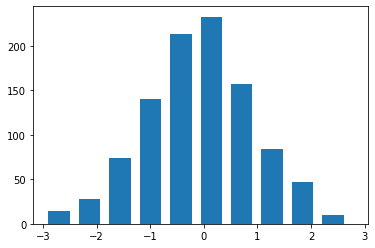

In [ ]:
s = np.random.normal(0, 1, 1000) # возьмем нормальное распределение и порисуем

plt.hist(s, bins=10, width=0.4) #на сколько бинов делим наши данные, для красоты уменьшим размер столбцов
plt.show()

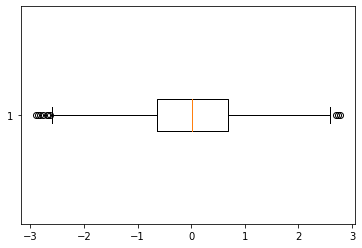

In [ ]:
plt.boxplot(s, vert=False)
plt.show() # видим то, что должны были:
# центр - медиана (очевидно в 0)
# коробка - квартили (25 и 75)
# линии - перцентили (5-95)
# точки - выбросы

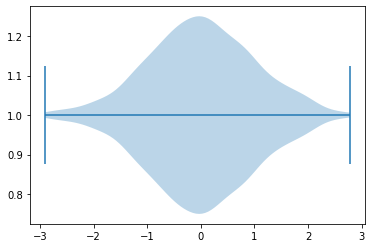

In [ ]:
plt.violinplot(s, vert=False) #то же самое, что и ящик с усами, только еще с распределением (видим нормальное - нормально)
plt.show()

### Форматирование графиков

Отлично, теперь мы, допустим, хотим нарисовать несколько линий на одном (или же хотим нарисовать несколько типов графиков на одном):

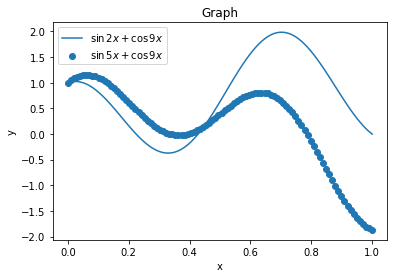

In [ ]:
y_1 = np.sin(5 * x) + np.cos(9 * x)

plt.plot(x, y, label="$\sin 2x + \cos 9x$")
plt.scatter(x, y_1, label="$\sin 5x + \cos 9x$") #просто добавляем на отрисовку еще точки
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.legend()
plt.show()

Что плохо? Цвета одинаковые, а еще хотим точки поменьше сделать, наверное (чтобы было более заметны сами точки)

Что предлагает matplotlib для кастомизации?

Plot:

* linewidth - параметр, отвечающий за толщину линии

* [linestyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) - как рисовать (можно черточками, можно прямой линией etc)

* format - можно задать сразу три параметра, передав всего 1 строчку:

```
[marker][line][color] - '^r:'
```

Scatter:

* s - задаем размер точек

* [marker](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) - что ставим (точки, кружочки, квадратики, треугольники etc)

Bar:

* width - толщина столбцов

* bottom - нижняя координата для OY (по дефолту 0)

* align - как центровать координаты x (center, edge - делает слева, но если задать негативный width, то вправо)


Общее:

* [c, color](https://matplotlib.org/stable/tutorials/colors/colors.html) - параметр, задающий цвет (можно задать единый цвет, можно для каждой точки-значения задать свой собственный)

* alpha - прозрачность (от 0 до 1, чем больше - тем более ярко)

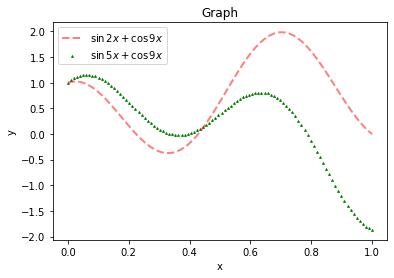

In [ ]:
plt.plot(x, y, 'r--', label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, label="$\sin 5x + \cos 9x$", c='g', s=3, marker='^')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.legend()
plt.show()

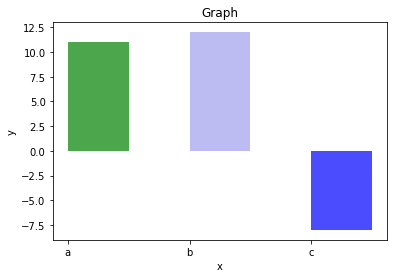

In [ ]:
names = ["a", "b", "c"]
values = [11, 12, -8]

plt.bar(names, values, width=0.5, alpha=0.7, align='edge', color=['g', '#a0a0ee', 'b']) #вот тут не работает c, работает color
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.show()

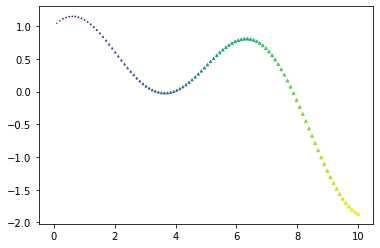

In [ ]:
plt.scatter((x * 10), y_1, label="$\sin 5x + \cos 9x$", c=x, s=(x * 10), marker='^') # размеры и цвета можно задавать даже с помощью самих данных!
plt.show()

### Несколько графиков

Отлично, порисовали. Теперь хотим:

* Сделать график больше

* Сделать два графика

* Добавить вторую OY axis

Что вообще происходит, когда мы пишем plt.plot тот же самый?

На самом деле мы создаем объект (типа canvas, холста), на котором происходят все отрисовки (так называемая figure). Это то, что таится под plt. А значит, что у него есть параметры, которые можно менять

Например, если мы сделаем график больше - то передаем значения размеров объекту холста, если делим его на части - то вводим координатную сетку, в которой говорим в какой части холста делать отрисовку (делим нашу общую figure на несколько подфигур)

Есть 2 способа разбить холст на несколько частей:

* plt.subplot(n, m, k) - разбей на части n x m и возьми часть k (нумерация с 1 слева-направо сверху-вниз)

* plt.subplots(figsize, n_cols, n_rows) - делит на части и возвращает фигуру и axes - координатную сетку

В чем может быть проблема у subplots? В том, что он задает фиксированное и забитое железно разделение (то есть тут меньше возможности как-то делить нашу плоскость)


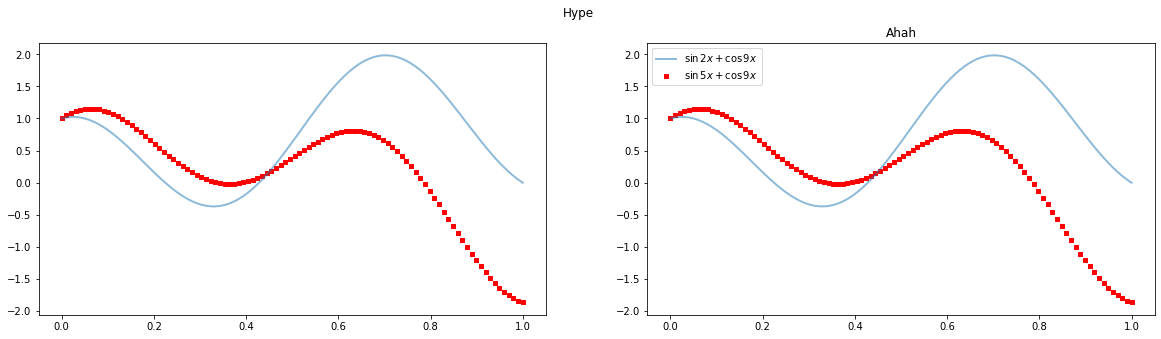

In [ ]:
plt.figure(figsize=[20, 5]) #создаем фигуру, внутри которой будем рисовать
plt.suptitle("Hype") # общее название
plt.subplot(1, 2, 1) # создаем subplots (в данном случае разрезали plt на 1x2, обращаемся к 1 части)
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
plt.subplot(1, 2, 2) # обращаемся ко второй части
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
plt.title("Ahah")
plt.legend()
plt.show() # получили две фигуры размера 5x10

А теперь хотим, чтобы один график был поменьше (или туда еще что-нибудь добавить, 2 графика), а второй оставить таким же

Идея: вначале разрезать фигуру на 4 части и в 1,3 добавить наши рисунки. Потом пофигачим на 2 части и нарисуем на второй части то, что нам нужно

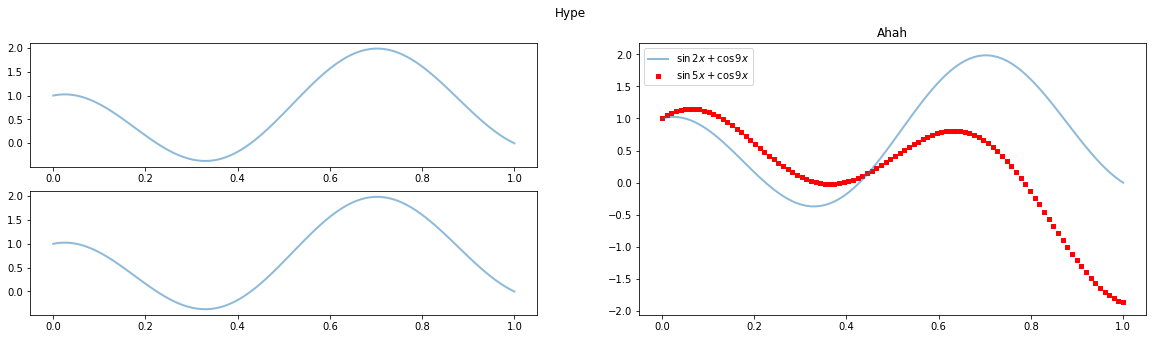

In [ ]:
plt.figure(figsize=[20, 5]) #создаем фигуру, внутри которой будем рисовать
plt.suptitle("Hype") # общее название
plt.subplot(2, 2, 1) # обращаемся к 1 части
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.subplot(2, 2, 3) # обращаемся к 3 части
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.subplot(1, 2, 2) # обращаемся ко 2 части разреза 1x2
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
plt.title("Ahah")
plt.legend()

plt.show()

Если происходят конфликты, то последний график затрет все остальные (так что аккуратнее)

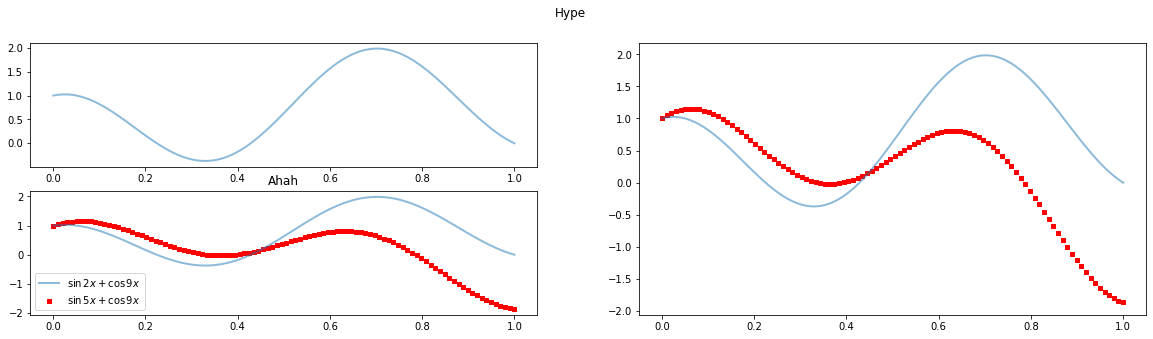

In [ ]:
fig, ax = plt.subplots(figsize=[20, 5], nrows=2, ncols=2) #можно вот так создавать сетку

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=[20, 5], nrows=2, ncols=2) #для каждого графика можно отдельно создать свой вид

fig.suptitle("Hype") # общее название
ax[0, 0].plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
ax[1, 0].plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
ax[1, 0].scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
ax[1, 0].set_title("Ahah") # обратите внимание, что если обращаться вот так, то у нас все форматирования идут как set_...
ax[1, 0].legend()

plt.subplot(1, 2, 2) # но с subplot также хорошо работает
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)

plt.show()

Теперь нарисуем вот такой график:

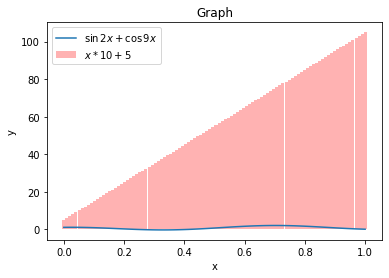

In [ ]:
y_1 = x * 100 + 5

plt.plot(x, y, label="$\sin 2x + \cos 9x$")
plt.bar(x, y_1, label="$x * 10 + 5$", width=0.01, color='r', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.legend()
plt.show()

Выглядит, мягко говоря, плохо. За счет разного масштаба мы получаем нечто непонтяное. Хотелось бы просто иметь разные масштабы для каждого из графиков

Благо, что с помощью subplots мы можем такого добиться!

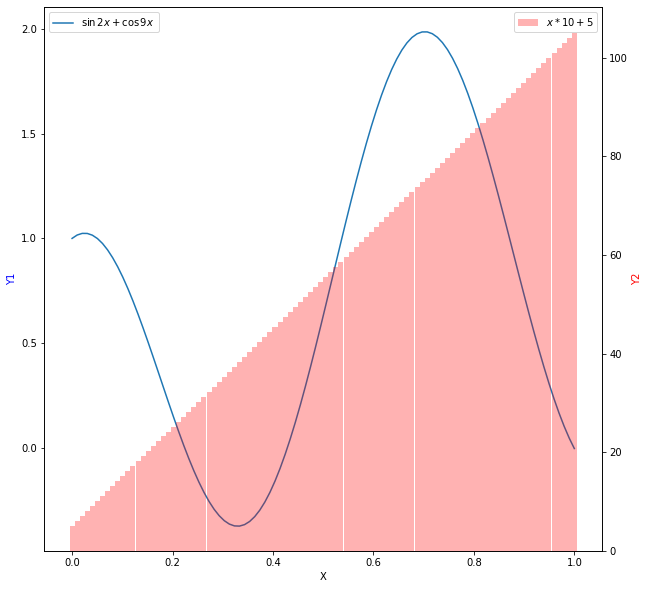

In [ ]:
fig, ax1 = plt.subplots(figsize=[10, 10]) #создаем фиктивную сетку размера 1x1

ax1.set_xlabel('X') # обратите внимание, что в subplots все работает через set_
ax1.set_ylabel('Y1', c = 'b')
ax1.plot(x, y, label="$\sin 2x + \cos 9x$")
ax1.legend(loc='upper left') #разместили легенду в другом месте

ax2 = ax1.twinx() #создаем копию, так сказатб
ax2.set_ylabel('Y2', color = 'r')
ax2.bar(x, y_1, label="$x * 10 + 5$", width=0.01, color='r', alpha=0.3)

ax2.legend()
plt.show()

### Подписи на графике

Допустим, что теперь хотим подписать какие-нибудь экстремальные значения (например, что вот тут максимум с таким значением, а тут минимум с таким значением)

Это можно сделать с помощью [annotate](https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py)

В чем проблема? Это делать больно и неприятно, потому что по сути вы должны укзаать, что, куда и как (зато можно делать кучу разных вещей, как будто мы в графическом редакторе)

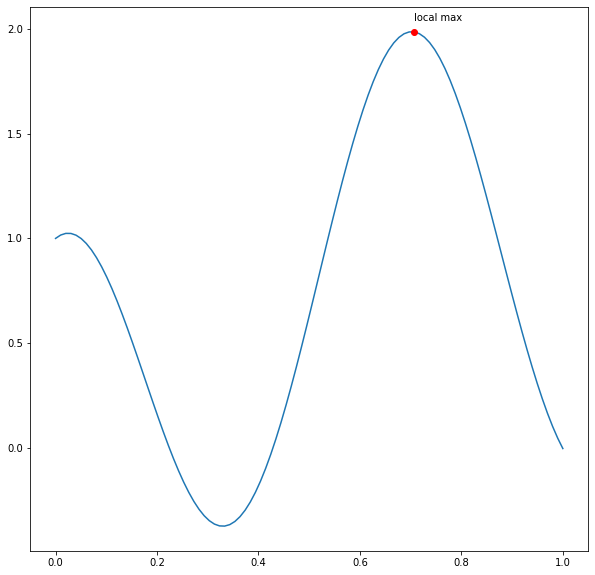

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10]) #создаем фиктивную сетку размера 1x1, чтобы размер задать

location = (x[np.argmax(y)], max(y))

ax.plot(x, y, label="$\sin 2x + \cos 9x$")
ax.plot(location[0], location[1], 'or')
ax.annotate('local max', xy=location,
            xytext=(location[0], location[1] + 0.05)
            )
plt.show()

### Что дальше?

А еще в matplotlib можно рисовать 3D-штуки! [тык](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html)

Можно рисовать как и линии. так и уровни, да в целом много чего (для математики больше чем сгодится)

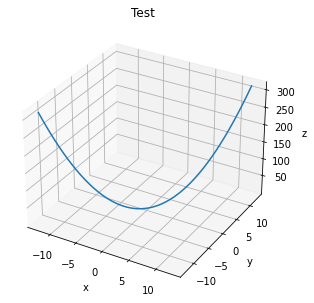

In [ ]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-4 * np.pi, 4 * np.pi, 50)
y = np.linspace(-4 * np.pi, 4 * np.pi, 50)
z = x**2 + y**2

ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Test")
plt.show()

## Попугай дня

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Kea.jpg/1024px-Kea.jpg)

Это кеа, или же клоуны гор

Их так назвали из-за их особенной сообразительности (они умеют решать загадки, например) и любознательности. Они не упускают случая исследовать содержимое рюкзаков или автомобилей, которые им приглянулись, чем портят вещи, машины, да что угодно

Но при этом они очень хорошо и быстро привыкают к людям и в целов очень игривые :з